In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [8]:
mat_name = 'matlab_d=1.mat'
out_name = 'test1.out'

res = loadmat(mat_name)
with open(out_name,'r') as f:
    text = f.read()
text = text.split('\n')
d = np.array(res['res_d'][0], dtype = int)
eps = np.array(res['res_eps'][0], dtype = float)
loss = np.array(res['res_loss'][0], dtype = float)
npoint = np.array(res['res_npoint'][0], dtype = int)
max_len = d.shape[0]

uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']
uq = uq[:max_len]

ud_p = [float(text[i+2]) for i,t in enumerate(text) if t == 'ud_p =']
ud_p = ud_p[:max_len]

zk = [float(text[i+2]) for i,t in enumerate(text) if t == 'zk =']
zk = zk[:max_len]

e_val = np.array(zk)**2

dat_dict1 = {
    'd':d,
    'eps':eps,
    'loss':loss,
    'npoint':npoint,
    'uq':uq,
    'zk':zk,
    'ud_p':ud_p,
    'e_val':e_val
}

# trim to equal length
min_len = min([len(dat_dict1[k]) for k in dat_dict1])
min_len -= 2
print(min_len)
for k in dat_dict1:
    dat_dict1[k] = dat_dict1[k][:min_len]

21


In [9]:
dat_dict['d']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
mat_name = 'matlab_d=23.mat'
out_name = 'test23.out'

res = loadmat(mat_name)
with open(out_name,'r') as f:
    text = f.read()
text = text.split('\n')
d = np.array(res['res_d'][0], dtype = int)
eps = np.array(res['res_eps'][0], dtype = float)
loss = np.array(res['res_loss'][0], dtype = float)
npoint = np.array(res['res_npoint'][0], dtype = int)
max_len = d.shape[0]

uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']
uq = uq[:max_len]

ud_p = [float(text[i+2]) for i,t in enumerate(text) if t == 'ud_p =']
ud_p = ud_p[:max_len]

zk = [float(text[i+2]) for i,t in enumerate(text) if t == 'zk =']
zk = zk[:max_len]

e_val = np.array(zk)**2

dat_dict2 = {
    'd':d,
    'eps':eps,
    'loss':loss,
    'npoint':npoint,
    'uq':uq,
    'zk':zk,
    'ud_p':ud_p,
    'e_val':e_val
}

# trim to equal length
min_len = min([len(dat_dict2[k]) for k in dat_dict2])

print(min_len)
for k in dat_dict2:
    dat_dict2[k] = dat_dict2[k][:min_len]

41


In [13]:
dat_dict = {k:np.array(list(dat_dict1[k])+list(dat_dict2[k])) for k in dat_dict1}

In [14]:
data = pd.DataFrame(dat_dict)

In [17]:
data = data[data.d==2]

In [40]:
data

,d,eps,loss,npoint,uq,zk,ud_p,e_val
21,2,0.0000,-0.365584,16,0.019385,3.846108,0.104832,14.792547
22,2,0.0000,-0.365584,64,0.009746,3.832505,0.052336,14.688098
23,2,0.0000,-0.365584,256,0.004966,3.831755,0.026657,14.682343
24,2,0.0050,-0.365580,16,0.019190,3.839789,0.103435,14.743979
25,2,0.0050,-0.365580,64,0.009764,3.826346,0.052263,14.640925
26,2,0.0050,-0.365580,256,0.004989,3.825604,0.026694,14.635246
27,2,0.0010,-0.365584,16,0.019229,3.844840,0.103919,14.782791
28,2,0.0010,-0.365584,64,0.009815,3.831269,0.052669,14.678623
29,2,0.0010,-0.365584,256,0.004924,3.830520,0.026411,14.672883
30,2,0.0005,-0.365584,16,0.018468,3.845474,0.099841,14.787667


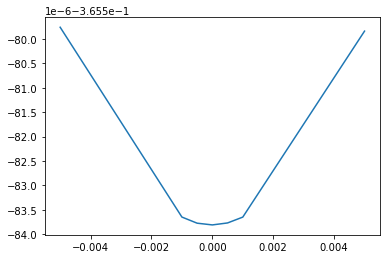

In [18]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

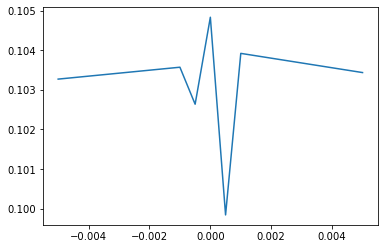

In [19]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

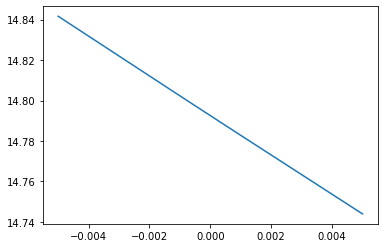

In [21]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['e_val'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

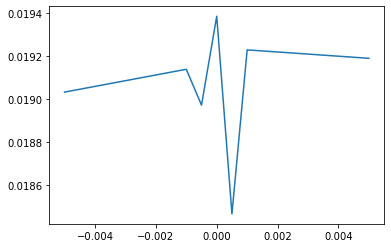

In [22]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

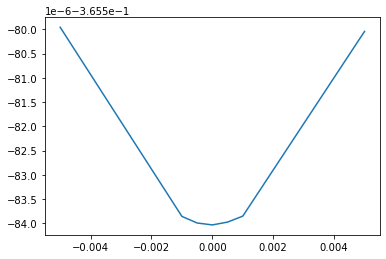

In [23]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

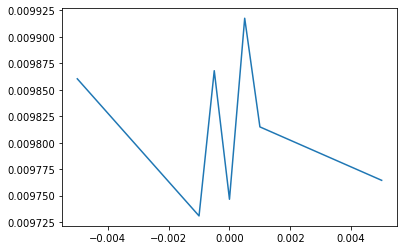

In [24]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

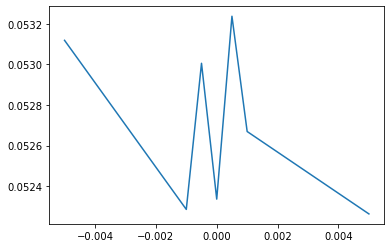

In [25]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

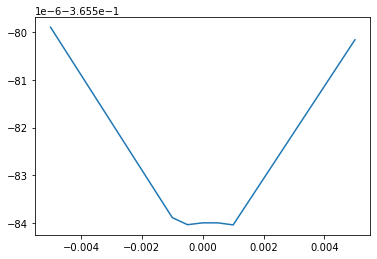

In [26]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['loss'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

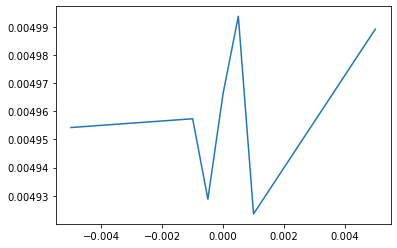

In [27]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['uq'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

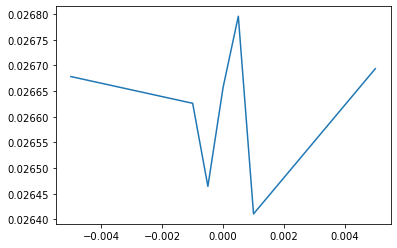

In [28]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['uq'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

<ipython-input-117-b5064592e9e1>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(abs(y-z)))


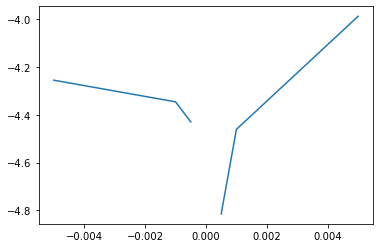

In [117]:
plt.plot(x, np.log10(abs(y-z)))

In [29]:
eps = 5e-3

n = 256
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri256 = deri

n = 64
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri64 = deri

n = 16
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri16 = deri

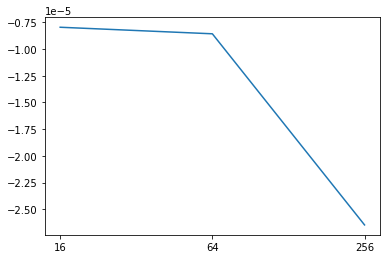

In [30]:
plt.plot(['16','64','256'], [deri16, deri64, deri256])

In [52]:
x2

-0.3655790801141029

In [82]:
with open('test.out','r') as f:
    text = f.read()
text = text.split('\n')

In [85]:
text = text.split('\n')

In [98]:
uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']

In [99]:
uq

[0.019384854464177,
 0.009746486812211,
 0.004966298991687,
 0.019257391935054,
 0.009722515071168,
 0.004863473018722,
 0.019665277433348,
 0.009825183558538,
 0.004931729938919,
 0.0189248272107,
 0.009767084114316,
 0.004950992232231,
 0.019665262547568,
 0.009795347668337,
 0.004910776846609,
 0.018860638347552,
 0.009666709033792,
 0.004921221314666,
 0.01891064338254,
 0.009883511054177,
 0.004929157269567,
 0.019384854464121,
 0.009746486812181]

Text(0.5, 1.0, 'loss difference')

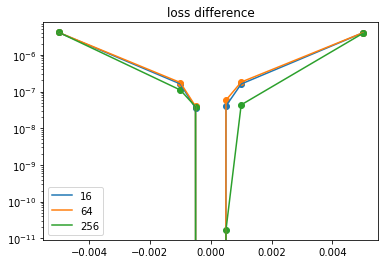

In [46]:
plt_val = 'loss'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

plt.yscale('log')
plt.legend()

plt.title(plt_val + ' difference')

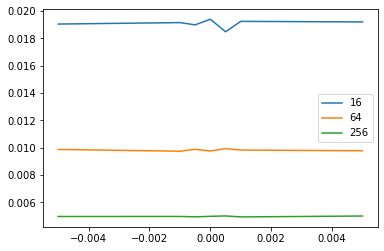

In [32]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)
plt.legend()

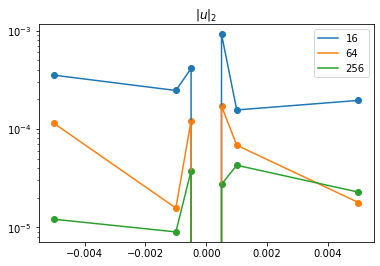

In [45]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

plt.yscale('log')

plt.title(r'$\|u\|_2$')
plt.legend()

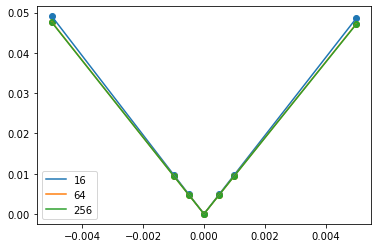

In [34]:
plt_val = 'e_val'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

plt.plot()
plt.legend()

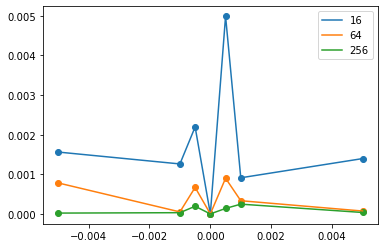

In [35]:
plt_val = 'ud_p'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)
plt.scatter(x,y)

plt.plot()
plt.legend()